<center>
<img src="https://2223moodle.isel.pt/pluginfile.php/1/theme_adaptable/logo/1631635830/logo-isel_inv3.png" width="250">
<h3>Licenciatura em Engenharia Informática e Multimédia</h3><br>
<br>
<h2>Aprendizagem Automática (AA)</h3>
<h3>1º Trabalho Laboratorial – Pima Indians Diabetes Dataset </h3> 
<br>

<br>
Trabalho Realizado por:<br>
Gonçalo Silva <b>A48328</b><br>
Diogo Lobo <b>A48168</b><br>
Turma 52D<br><br>
Docente: Gonçalo Xufre <br> 
<br>
15 de Outubro 2024
</center>


***
<br>
<a id='section0'></a>
<center><h2><b>Índice</b></h2></center>

- [Introdução;](#section1)
- [Desenvolvimento;](#section2)
- [Conclusão;](#section3)
- [Bibliografia;](#section4)


# MUDAR INTRODUCAO

<a id='section1'></a>
## <center><b>Introdução</b></center>
<div style="text-align: justify">
<h3> Enquadramento </h3>

No âmbito da análise de dados médicos, o Pima Indians Diabetes Dataset oferece um conjunto de informações significativas sobre a saúde de uma comunidade indígena com uma elevada prevalência de diabetes. Desenvolvido pelo Instituto Nacional de Diabetes e Doenças Digestivas e Renais dos Estados Unidos, este conjunto de dados tem servido como um importante recurso para a investigação da condição e para o desenvolvimento de modelos preditivos. A sua análise permite observar as relações entre características clínicas e a incidência de diabetes, um problema de saúde pública crescente.

<h3> Objetivo </h3>

O objetivo principal deste trabalho é desenvolver e avaliar três modelos de classificação binária para prever a ocorrência de diabetes com base em indicadores clínicos do conjunto de dados dos índios Pima. Entre os modelos escolhidos, será incluído o RandomForestClassifier, além de outros dois classificadores. A avaliação do desempenho dos modelos permitirá determinar a eficácia de cada um na predição da condição, comparando métricas de classificação e ajustando hiperparâmetros para otimizar os resultados.

<h3> Métodos </h3>

A metodologia para o desenvolvimento deste trabalho envolve diversas etapas. Inicialmente, será feito o pré-processamento dos dados, investigando o impacto da normalização nas classificações. Em seguida, serão aplicadas técnicas de treino e validação para garantir a fidedignidade da avaliação. As métricas de desempenho dos classificadores serão analisadas e comparadas para identificar o modelo mais adequado para a tarefa de predição. Justificaremos as escolhas metodológicas e de modelos implementados, além de realizar uma análise detalhada dos resultados para uma compreensão aprofundada da eficácia dos algoritmos.
</div>



In [33]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import sqrtm
import numpy.random as rd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [34]:
q = pickle.load(open('pimaDiabetes.p', 'rb'))

In [35]:
q.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [36]:
X = q['data']
y = q['target']
feature_names = q['feature_names']
descr = q['DESCR']

In [37]:
print(descr)

This dataset is originally from the National
Institute of Diabetes and Digestive and Kidney Diseases.
The objective of the dataset is to diagnostically predict
whether or not a patient has diabetes, based on certain
diagnostic measurements included in the dataset.
Several constraints were placed on the selection of these
instances from a larger database. In particular, all patients
here are females at least 21 years old of Pima Indian heritage.
The dataset contains information of 768 women from a population
near Phoenix, Arizona, USA. The outcome tested was Diabetes,
268 tested positive and 500 tested negative.

For more inforamtion:
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S.
(1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus.
In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265).
IEEE Computer Society Press.


In [38]:
feature_names

['Number of times pregnant',
 'Plasma glucose concentration at 2 Hours in an oral glucose tolerance test (GTIT)',
 'Diastolic Blood Pressure (mm Hg)',
 'Triceps skin fold thickness (mm)',
 '2-Hour Serum insulin (µh/ml)',
 'Body mass index [weight in kg/(Height in m)]',
 'Diabetes pedigree function',
 'Age (years)']

In [39]:
np.unique(y)

array([0, 1], dtype=uint8)

In [40]:
#Dados totais de sem diabetes e com diabetes, respectivamente
XSD = X[y==0,:]
XCD = X[y==1,:]

print(X.shape)
print(XSD.shape)
print(XCD.shape)


(768, 8)
(500, 8)
(268, 8)


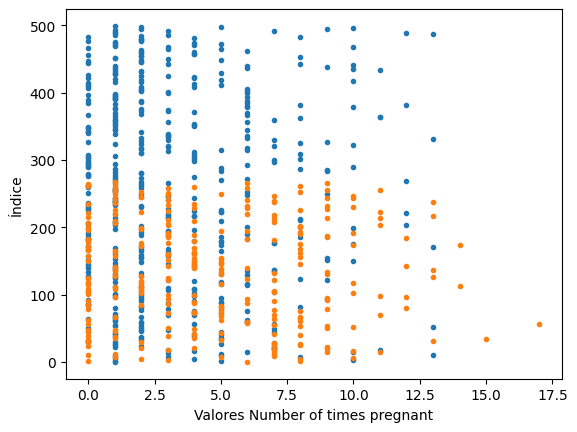

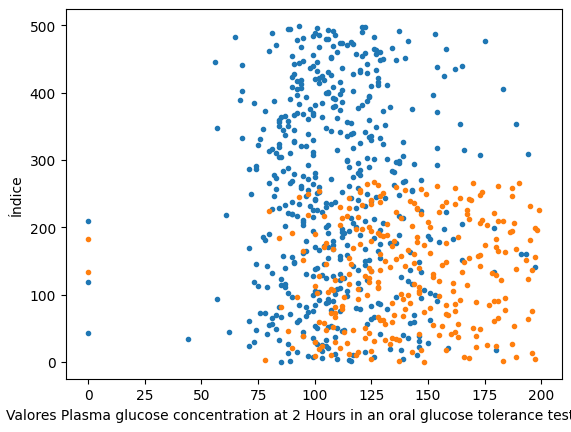

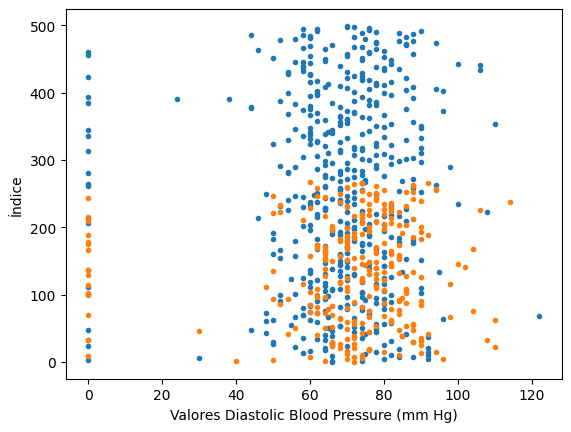

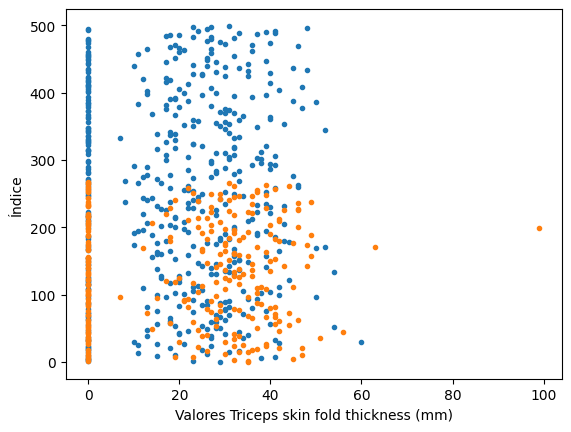

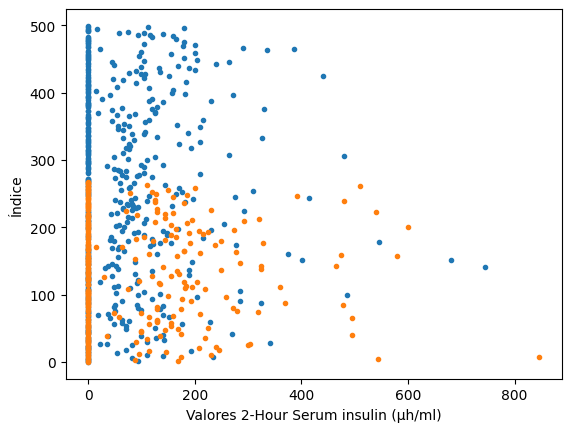

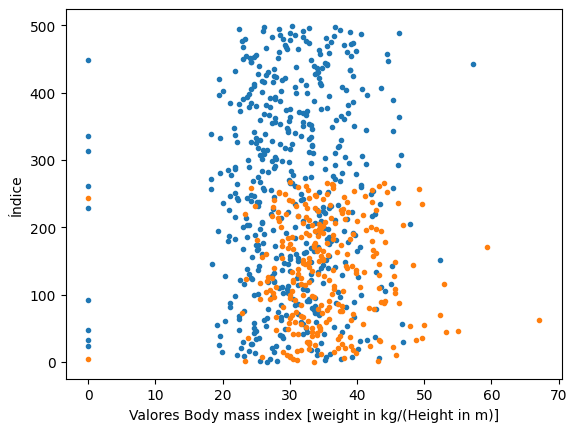

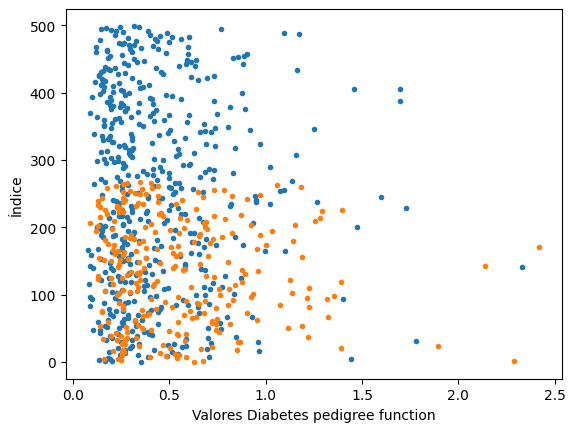

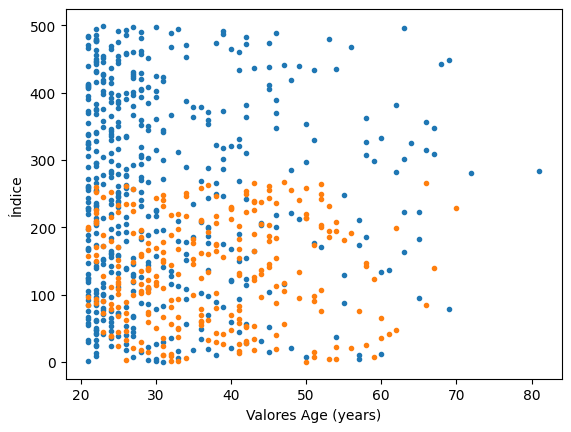

In [41]:
#Vizualização dos dados totais
for i in range(0,8):
    y_values = np.arange(len(XSD[:, i]))  
    plt.plot(XSD[:, i], y_values, '.',label='Classe Sem Diabetes')

    y_values2 = np.arange(len(XCD[:, i]))  
    plt.plot(XCD[:, i], y_values2, '.',label='Classe Com Diabetes')

    plt.xlabel("Valores "+feature_names[i])    
    plt.ylabel("Índice")                  
    plt.show()




(450, 8)
(241, 8)


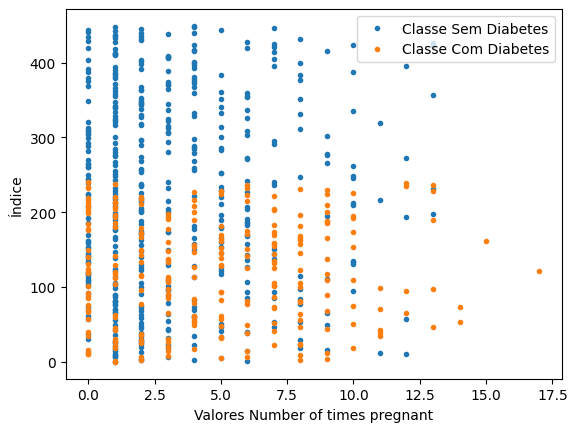

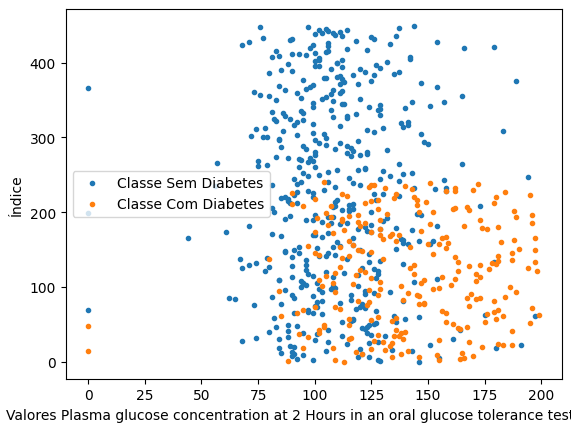

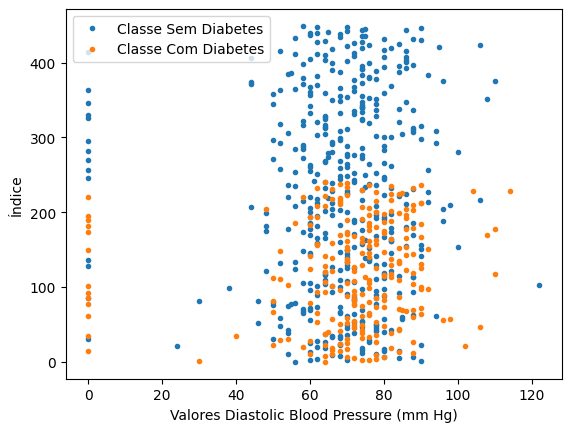

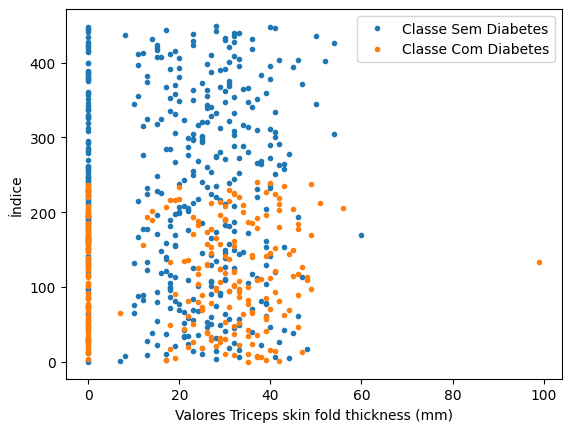

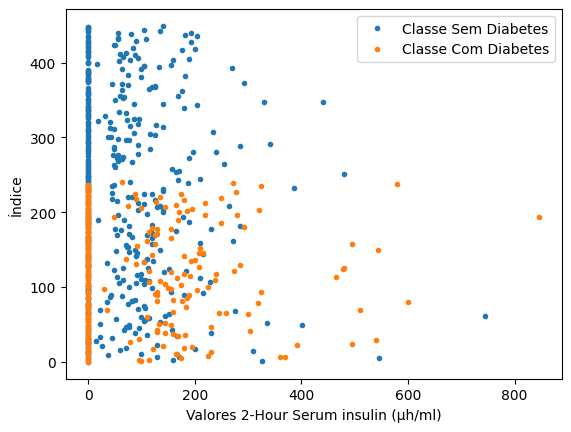

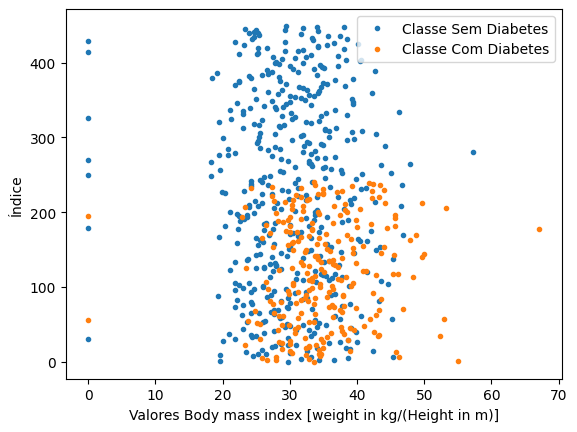

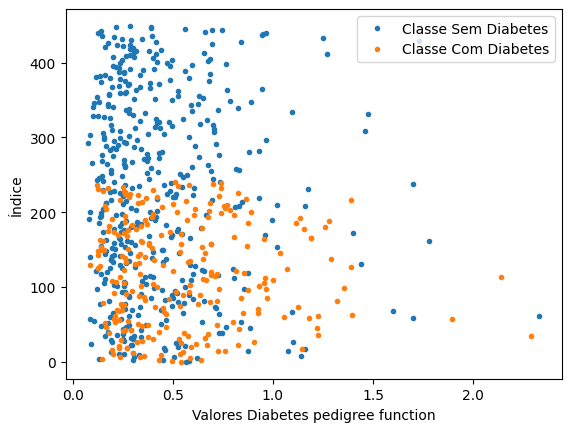

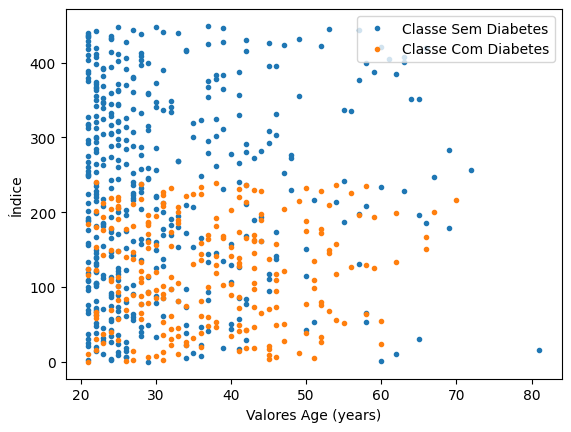

In [42]:
# Dividir os dados em 80% treino e 20% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# Dados sem diabetes e com diabetes de treino, respectivamente
XSD_train = X_train[y_train == 0, :]
XCD_train = X_train[y_train == 1, :]

print(XSD_train.shape)

print(XCD_train.shape)

# Vizualização dos dados
for i in range(0, 8): 
    y_values = np.arange(len(XSD_train[:, i]))  
    plt.plot(XSD_train[:, i], y_values, '.', label='Classe Sem Diabetes')

    y_values2 = np.arange(len(XCD_train[:, i]))  
    plt.plot(XCD_train[:, i], y_values2, '.', label='Classe Com Diabetes')

    plt.xlabel("Valores " + feature_names[i])    
    plt.ylabel("Índice")                  
    plt.legend()
    plt.show()

In [43]:

logreg=LogisticRegression(max_iter=1000).fit(X_train,y_train)

print('Prob Acertos: %.1f'%(logreg.score(X_test,y_test)*100))

Prob Acertos: 75.3


## gridSearch

Ajudar a descobrir o intervalo de hiper paraemtros

In [44]:
# Define a parameter grid for hyperparameter tuning of a model, typically used in GridSearchCV or similar methods
param_grid = {
    # 'penalty': Specifies the norm used in the penalization ('l1', 'l2', 'elasticnet', or 'none')
    'penalty': ['l1', 'l2', 'elasticnet'],

    # 'C': Inverse of regularization strength; smaller values specify stronger regularization
    # Using np.logspace to create a range of values from 10^-4 to 10^4, distributed logarithmically
    'C': np.logspace(-4, 4, 20),

    # 'solver': Algorithm to use in the optimization problem
    # 'lbfgs' (Limited-memory Broyden-Fletcher-Goldfarb-Shanno), 'liblinear' (Library for Large Linear Classification), 'saga' (Stochastic Average Gradient Descent)
    'solver': ['lbfgs', 'liblinear', 'saga'],

    # 'max_iter': Maximum number of iterations taken for the solvers to converge
    # Providing a range of values to explore how the number of iterations affects model performance
    'max_iter': [100, 1000, 2500, 5000]
}

param_grid = [
    {
        'solver': ['lbfgs', 'newton-cg', 'sag'],
        'penalty': ['l2'],
        'C': np.logspace(-4, 4, 10),
        'max_iter': [1000]
    },
    {
        'solver': ['liblinear', 'saga'],
        'penalty': ['l1', 'l2'],
        'C': np.logspace(-4, 4, 10),
        'max_iter': [1000]
    }
]

param_grid = [
    {
        'penalty': ['l2', None],
        'C': np.logspace(-4, 4, 20),
        'solver': ['lbfgs'],
        'max_iter': [100, 1000, 2500, 5000]
    },
    {
        'penalty': ['l1', 'l2'],
        'C': np.logspace(-4, 4, 20),
        'solver': ['liblinear'],
        'max_iter': [100, 1000, 2500, 5000]
    },
    {
        'penalty': ['l1', 'l2', 'elasticnet', None],
        'C': np.logspace(-4, 4, 20),
        'solver': ['saga'],
        'max_iter': [100, 1000, 2500, 5000],
        'l1_ratio': [0.5]  # Only for 'elasticnet' penalty
    }
]

In [45]:
# grid_search = GridSearchCV(logreg,param_grid,scoring='accuracy',n_jobs=-1,cv=5,verbose=1)
# # Fit the grid search model to the resampled training data
# grid_search.fit(X_train, y_train)

grid_search = GridSearchCV(logreg, param_grid,scoring='accuracy', cv=5, n_jobs=-1,verbose=1)
grid_search.fit(X_train, y_train)
# Extract the best parameters found during the grid search
best_params = grid_search.best_params_

# Extract the best estimator (model) found during the grid search
best_estimator = grid_search.best_estimator_

# Print the best parameters found
print("Best Parameters:", best_params)

# Print the best estimator (model) found
print("Best Estimator:", best_estimator)

Fitting 5 folds for each of 640 candidates, totalling 3200 fits
Best Parameters: {'C': np.float64(4.281332398719396), 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Estimator: LogisticRegression(C=np.float64(4.281332398719396), solver='liblinear')


In [46]:
y_pred_logreg = grid_search.predict(X_test)

In [47]:
print('Regressão logistica')
print('Accuracy: ', accuracy_score(y_test,y_pred_logreg))
print('Relatório de Classificação: \n', classification_report(y_test,y_pred_logreg))

Regressão logistica
Accuracy:  0.7662337662337663
Relatório de Classificação: 
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        50
           1       0.67      0.67      0.67        27

    accuracy                           0.77        77
   macro avg       0.74      0.74      0.74        77
weighted avg       0.77      0.77      0.77        77



In [48]:
cm = confusion_matrix(y_test, y_pred_logreg)
cm

array([[41,  9],
       [ 9, 18]])